# Support Vector Regression (SVR)

## Import the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,2:3]
print(X)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [13]:
print(Y)

    Salary
0    45000
1    50000
2    60000
3    80000
4   110000
5   150000
6   200000
7   300000
8   500000
9  1000000


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

# feature scaling is done to reduce the scale of the data to small one for easy calculation

In [15]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [16]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [17]:
## Training of the SVR Model on the whole data set

from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,Y)

C:\Users\amita\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting the new result

In [18]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

## Visualisation of the SVR result

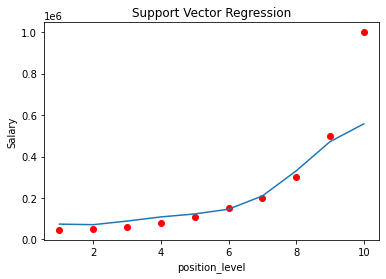

In [19]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color="red")
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)))
plt.title("Support Vector Regression")
plt.xlabel("position_level")
plt.ylabel("Salary")
plt.show()

In [21]:
# above curve is not smooth so we can use below codes to make it smooth

In [ ]:
## Visualising SVR result (Higher resolution) 

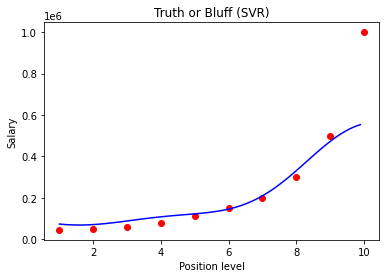

In [25]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()